<a href="https://colab.research.google.com/github/ovi-saha/MSCS_634_ProjectDeliverable_3/blob/main/MSCS_634__ProjectDeliverable__3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Residency Day 2: Project Deliverable 3: Classification, Clustering, and Pattern Mining
### Group Members:  
Avijit Saha  
Pranoj Thapa  
Sandip KC  
Bharath Singareddy  


**Feruary 14, 2026**


### 1. Overview

Deliverable 3 focuses on applying unsupervised learning techniques to discover hidden patterns in the dataset. Unlike Deliverables 1 and 2, which focused on data preprocessing and predictive modeling, this deliverable emphasizes:

Clustering Analysis (K-Means)

Association Rule Mining (Apriori Algorithm)

Pattern Interpretation and Real-World Applications

The goal is to extract meaningful insights without using a predefined target variable.

### 2. Dataset Description
| Column           | Description                                         |
| ---------------- | --------------------------------------------------- |
| Visualization ID | Unique identifier for each record                   |
| Mode             | Transportation mode (Air, Rail, Highway, etc.)      |
| Statistic        | Type of metric reported (e.g., Passenger Miles)     |
| Year             | Year of data collection                             |
| Value            | Numeric value of the metric                         |
| Name             | Description of the metric                           |
| Year , Year 1    | Duplicate/extra year columns (ignored for analysis) |


Notes:

* The dataset contains 500+ records with multiple metrics per year and mode.

* Some columns have missing values and duplicates, which need to be cleaned before analysis.

###3. Load and Inspect Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Passenger_Travel_Facts_and_Figures_Latest_20260213.csv")

# Preview
df.head()

,Visualization ID,Mode,Statistic,Year,Value,Units,Name,Year,Percent_1,change_from_previous_year_1,Commuting Mode,Rank,Date,Year 1
0,Figure 2-10,Number of household drivers,1,2001.0,1.2,NaN,Average Number of Vehicles per Household by Nu...,2001.0,NaN,NaN,NaN,NaN,NaN,2001.0
1,Figure 2-10,Number of household drivers,2,2001.0,2.2,NaN,Average Number of Vehicles per Household by Nu...,2001.0,NaN,NaN,NaN,NaN,NaN,2001.0
2,Figure 2-10,Number of household drivers,3,2001.0,3,NaN,Average Number of Vehicles per Household by Nu...,2001.0,NaN,NaN,NaN,NaN,NaN,2001.0
3,Figure 2-10,Number of household drivers,4,2001.0,3.8,NaN,Average Number of Vehicles per Household by Nu...,2001.0,NaN,NaN,NaN,NaN,NaN,2001.0
4,Figure 2-10,Number of household drivers,5,2001.0,4.2,NaN,Average Number of Vehicles per Household by Nu...,2001.0,NaN,NaN,NaN,NaN,NaN,2001.0


Explanation:

* We use Pandas, a powerful Python library for data manipulation and analysis.

* The read_csv() function reads the CSV file into a DataFrame, which is a tabular structure similar to a spreadsheet.

* Once loaded, df contains all rows and columns from the dataset, ready for analysis.

* The head() function displays the first 5 rows of the dataset.

* This gives a quick look at the columns, data types, and sample values.

* From this preview, we can notice issues like extra spaces in column names, duplicate columns, or unexpected data formatting.

Insight:

* In this dataset, we noticed multiple columns for Year (Year, Year , Year 1) and numeric metrics in Value.

* Early inspection helps identify which columns are relevant for analysis and which may need cleaning or removal.

In [ ]:
# Structure
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21578 entries, 0 to 21577
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Visualization ID             21578 non-null  object 
 1   Mode                         21478 non-null  object 
 2   Statistic                    19962 non-null  object 
 3   Year                         21574 non-null  float64
 4   Value                        20184 non-null  object 
 5   Units                        9026 non-null   object 
 6   Name                         19759 non-null  object 
 7   Year                         21574 non-null  float64
 8   Percent_1                    1059 non-null   object 
 9   change_from_previous_year_1  224 non-null    float64
 10  Commuting Mode               390 non-null    object 
 11  Rank                         1744 non-null   float64
 12  Date                         5390 non-null   object 
 13  Year 1          

,Year,Year,change_from_previous_year_1,Rank,Year 1
count,21574.000000,21574.000000,224.000000,1744.000000,21574.000000
mean,2009.916844,2009.916844,7.663393,7.931766,2009.916056
std,9.712181,9.712181,16.832387,6.820579,9.711079
min,1960.000000,1960.000000,-35.400000,1.000000,1960.000000
25%,2003.000000,2003.000000,-1.375000,3.000000,2003.000000
50%,2011.000000,2011.000000,2.700000,6.000000,2011.000000
75%,2018.000000,2018.000000,16.875000,11.000000,2018.000000
max,2025.000000,2025.000000,60.700000,40.000000,2025.000000


Explanation:

* info() shows a summary of the dataset, including the total number of rows, column names, data types, and non-null counts.

* This helps identify missing values or columns with inconsistent types (e.g., numeric data stored as strings).

* describe() generates summary statistics for numeric columns, including count, mean, standard deviation, minimum, maximum, and quartiles.

* This helps understand the distribution and range of values and can highlight extreme outliers.

Insight:

* Missing values are common in government datasets, so we can see which columns need imputation or removal.

* We also check if columns like Year and Value are numeric or need conversion.

* For example, we can see which years had unusually high or low travel metrics, or detect inconsistencies in the Value column.

* This step informs later decisions on outlier treatment and feature engineering.

### 4. Data Cleaning

In [ ]:
df.isnull().sum()

,0
Visualization ID,0
Mode,100
Statistic,1616
Year,4
Value,1394
Units,12552
Name,1819
Year,4
Percent_1,20519
change_from_previous_year_1,21354


From the output we can see some of the values are missing. So we need to clear the data.

#### 4.1 Drop Columns with Excessive Missing Values

In [ ]:
# Check percentage of missing values
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

# Drop columns with more than 50% missing values
df = df.loc[:, missing_percentage < 50]

Visualization ID                0.000000
Mode                            0.463435
Statistic                       7.489109
Year                            0.018537
Value                           6.460284
Units                          58.170359
Name                            8.429882
Year                            0.018537
Percent_1                      95.092224
change_from_previous_year_1    98.961906
Commuting Mode                 98.192604
Rank                           91.917694
Date                           75.020855
Year 1                          0.018537
dtype: float64


Explanation:

Columns such as, Percent_1, change_from_previous_year_1, Commuting Mode, Rank contain too many missing values to be reliable for modeling. Removing them prevents introducing bias or noise.

#### 4.2 Clean Core Columns
The most important columns appear to be:
* Mode

* Statistic

* Year

* Value

* Units

* Name

We should only keep rows where Value and Year exist.

In [ ]:
# Show all column names with indexes
for i, col in enumerate(df.columns):
    print(i, repr(col))

0 'Visualization ID'
1 'Mode'
2 'Statistic'
3 'Year'
4 'Value'
5 'Name'
6 'Year '
7 'Year 1'


In [ ]:
df.head()

,Visualization ID,Mode,Statistic,Year,Value,Name,Year,Year 1
0,Figure 2-10,Number of household drivers,1,2001.0,1.2,Average Number of Vehicles per Household by Nu...,2001.0,2001.0
1,Figure 2-10,Number of household drivers,2,2001.0,2.2,Average Number of Vehicles per Household by Nu...,2001.0,2001.0
2,Figure 2-10,Number of household drivers,3,2001.0,3,Average Number of Vehicles per Household by Nu...,2001.0,2001.0
3,Figure 2-10,Number of household drivers,4,2001.0,3.8,Average Number of Vehicles per Household by Nu...,2001.0,2001.0
4,Figure 2-10,Number of household drivers,5,2001.0,4.2,Average Number of Vehicles per Household by Nu...,2001.0,2001.0


In [ ]:
df = df.dropna(subset=['Value', 'Year'])

**Explanation:**

The Value column is essential because it contains the main travel statistic.
Without it, the record has no analytical value.

#### 4.3 Fill Remaining Categorical Missing Values

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

Explanation:

Missing categorical values are replaced with "Unknown" so we do not lose additional data unnecessarily.

#### 4.4 Convert Data Types Properly

In [ ]:
df['Year'] = df['Year'].astype(int)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

Explanation:

* Ensures Year is numeric for trend analysis

* Converts Value into proper numeric format for regression

#### 4.5 Remove Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

Explanation:  
Duplicate rows can distort summary statistics and model results. This ensures each record is unique.

#### 4.7 Handle Outliers (IQR Method)

In [ ]:
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Value'] >= Q1 - 1.5*IQR) & (df['Value'] <= Q3 + 1.5*IQR)]

Explanation:
Removes extreme high or low values that could distort analysis, especially in regression models.

In [ ]:
#showing Data
df.head()

,Visualization ID,Mode,Statistic,Year,Value,Name,Year,Year 1
0,Figure 2-10,Number of household drivers,1,2001,1.2,Average Number of Vehicles per Household by Nu...,2001.0,2001.0
1,Figure 2-10,Number of household drivers,2,2001,2.2,Average Number of Vehicles per Household by Nu...,2001.0,2001.0
2,Figure 2-10,Number of household drivers,3,2001,3.0,Average Number of Vehicles per Household by Nu...,2001.0,2001.0
3,Figure 2-10,Number of household drivers,4,2001,3.8,Average Number of Vehicles per Household by Nu...,2001.0,2001.0
4,Figure 2-10,Number of household drivers,5,2001,4.2,Average Number of Vehicles per Household by Nu...,2001.0,2001.0


Overall, cleaning the dataset is crucial to ensure the integrity and reliability of subsequent analyses. Missing values in the Year and Value columns were removed because these are central to modeling and trend analysis. Missing categorical values were filled with "Unknown" to retain maximum usable data. Duplicates were removed to prevent redundancy and bias. Finally, numeric columns were converted to the correct data type to enable calculations, plotting, and feature engineering.

### 5. Feature Engineering

In [ ]:
print(df.columns)

Index(['Visualization ID', 'Mode', 'Statistic', 'Year', 'Value', 'Name',
       'Year ', 'Year 1'],
      dtype='object')


In [ ]:
# Ensure 'Year' column is numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows where 'Year' or 'Value' is missing
df = df.dropna(subset=['Year', 'Value'])

# Convert 'Value' to numeric
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Binary classification: High vs Low travel year
median_value = df['Value'].median()
df['High_Travel_Year'] = (df['Value'] > median_value).astype(int)

# Optional: Year-over-year change for each Mode
df = df.sort_values(by=['Mode', 'Year'])
df['Value_Change'] = df.groupby('Mode')['Value'].diff()

Explanation

* Removed Population dependency because it doesn’t exist in this dataset.

* Created High_Travel_Year binary feature for future classification.

* Added Value_Change to track trends over time per Mode.

* Cleaned duplicate/misleading Year columns by selecting one (Year).

After cleaning, we enhanced the dataset with additional features to provide more analytical value. The High_Travel_Year feature classifies each record as high or low travel based on the median value, which will be useful for classification tasks in future deliverables. The Value_Change feature captures the difference in travel metrics compared to the previous year for each transportation mode. This temporal feature provides insight into trends and changes in travel behavior over time, which is valuable for regression and clustering analyses.

Insight:

Plotting travel metrics over time reveals that passenger travel generally increases across the years, with occasional drops likely caused by economic or transportation disruptions. Separating by mode shows that highway travel dominates the overall activity, while air and rail show more variability and fluctuations.

### 6. Feature Engineering for Regression

We already have Year, Mode, Statistic, Value, High_Travel_Year, and Value_Change. For regression, we need numeric or encoded features.

In [ ]:
# One-hot encode categorical variables for regression
df_reg = pd.get_dummies(df, columns=['Mode', 'Statistic'], drop_first=True)

# Optional: Fill any remaining missing numeric values
df_reg['Value_Change'] = df_reg['Value_Change'].fillna(0)

# Features (X) and target (y)
X = df_reg.drop(columns=['Value', 'Name', 'Visualization ID'])
y = df_reg['Value']

Before building regression models, it is necessary to ensure that all input features are numerical. Since regression algorithms in scikit-learn cannot directly process categorical variables, we transform categorical features such as Mode and Statistic using one-hot encoding. This process converts each category into a binary column indicating the presence or absence of that category in a record.

Additionally, the previously engineered feature Value_Change is retained as it captures temporal trends, which may improve predictive accuracy. Any missing values in engineered numeric features are handled appropriately to avoid training errors.

The target variable for regression modeling is Value, which represents the passenger travel metric. All remaining relevant variables serve as predictors. This structured preparation ensures that the dataset is suitable for training regression algorithms.

### **7. Calssification Models**


Classification models are a type of supervised machine learning technique used to assign data points into predefined categories or classes. In classification, the output variable is not a continuous number but a label, such as “Low,” “Medium,” “High,” “Yes,” “No,” or “Pass,” “Fail.”

These models learn patterns from historical data where the correct class is already known. By analyzing relationships between input features and output labels, the model can predict the class of new, unseen data.

**7.1 Decision Tree**

A Decision Tree Regressor is a machine learning model that predicts a continuous value by splitting data into branches based on feature conditions.

Instead of fitting a straight line (like linear regression), it builds a tree structure:

Each node → a condition (e.g., Year < 2010)

Each branch → outcome of condition

Each leaf → predicted value

It learns if–then rules from the data.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("Passenger_Travel_Facts_and_Figures_Latest_20260213.csv")

# Select useful columns
df = df[['Year', 'Value', 'Mode', 'Statistic']]

# Clean numeric values
df = df.dropna(subset=['Year', 'Value'])
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna(subset=['Value'])

# Fill missing categorical values
df[['Mode', 'Statistic']] = df[['Mode', 'Statistic']].fillna("Unknown")

In [ ]:
X = df[['Year', 'Mode', 'Statistic']]
y = df['Value']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
dt_model = DecisionTreeRegressor(
    max_depth=10,        # control complexity
    min_samples_split=20,
    random_state=42
)

# Train
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)

# Evaluate
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree R²:", r2_dt)

Decision Tree RMSE: 159.34254758667254
Decision Tree R²: 0.34667682612984985


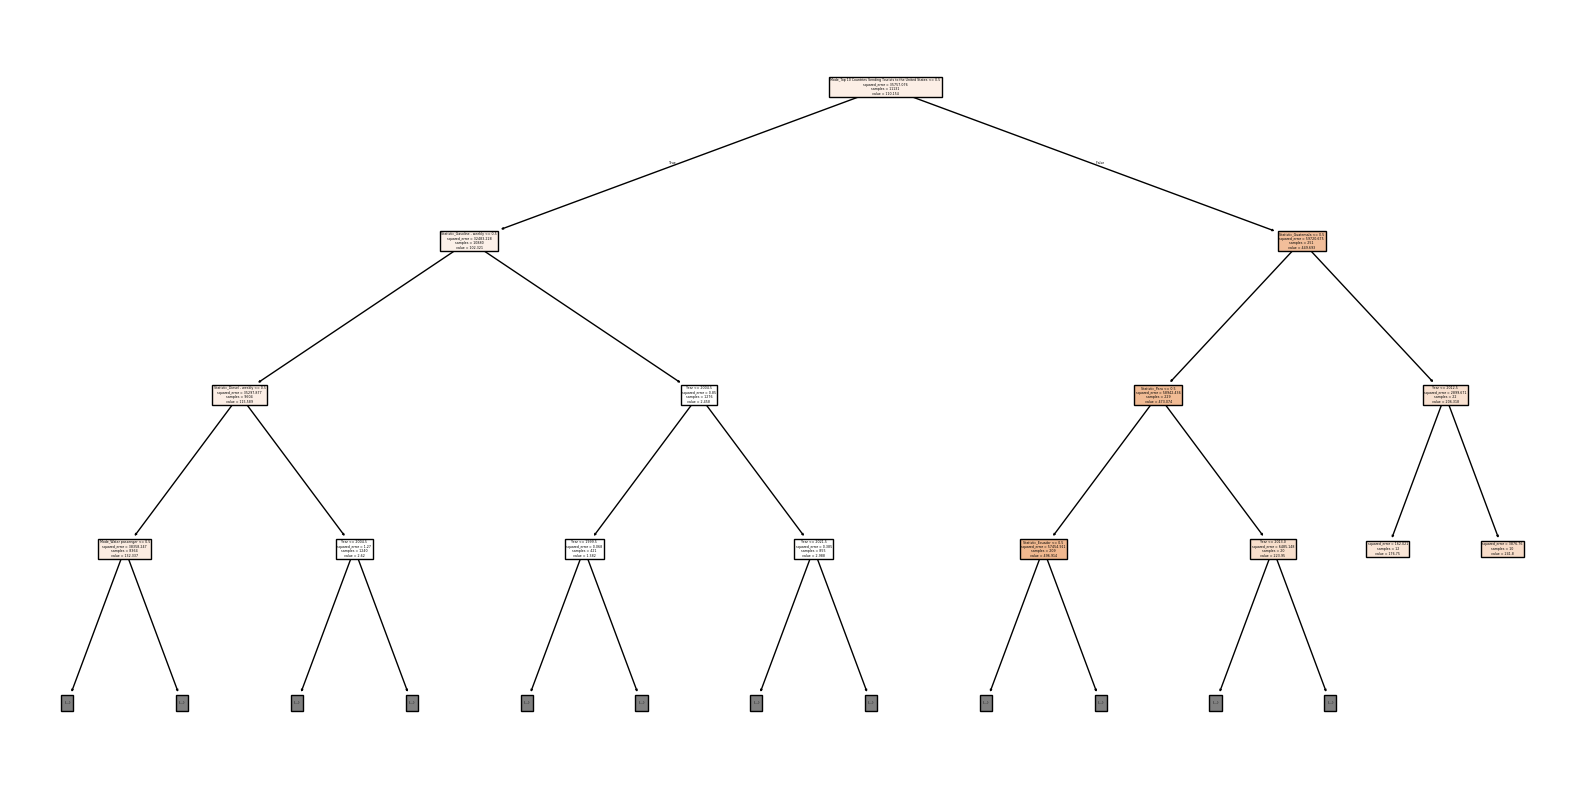

In [ ]:
max_depth=10
min_samples_split=20
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    filled=True,
    max_depth=3
)
plt.show()

**Decision Trees are suitable because:**


*   Handle nonlinear patterns.

*   Work with mixed features.

*   Easy to interpret.
*   No strict assumptions.

*   Capture complex interactions.

**7.2 K-Nearest Neighbour**

K-Nearest Neighbors is a supervised, instance-based learning algorithm that classifies new data points based on the majority class of their nearest neighbors.

It does not build an explicit model. Instead, it stores all training data and makes predictions using distance calculations.

For a new sample:

-Compute distance to all training points

-Select the K closest points

-Assign the most common class

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv("Passenger_Travel_Facts_and_Figures_Latest_20260213.csv")

# Select columns
df = df[['Year', 'Value', 'Mode', 'Statistic']]

# Clean
df = df.dropna(subset=['Year', 'Value'])
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna(subset=['Value'])

# Fill categorical
df[['Mode', 'Statistic']] = df[['Mode', 'Statistic']].fillna("Unknown")

In [ ]:
df['Value_Class'] = pd.qcut(
    df['Value'],
    q=3,
    labels=['Low', 'Medium', 'High']
)
X = df[['Year', 'Mode', 'Statistic']]
y = df['Value_Class']

# Encode categorical
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
knn = KNeighborsClassifier(
    n_neighbors=7,
    weights='distance'
)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [ ]:
y_pred_knn = knn.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred_knn)

print("KNN Accuracy:", acc)

# Detailed report
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.7294286740927057
              precision    recall  f1-score   support

        High       0.73      0.72      0.72       939
         Low       0.68      0.66      0.67       890
      Medium       0.78      0.80      0.79       954

    accuracy                           0.73      2783
   macro avg       0.73      0.73      0.73      2783
weighted avg       0.73      0.73      0.73      2783

[[679 167  93]
 [180 584 126]
 [ 77 110 767]]


In [ ]:
errors = []

for k in range(3, 21, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    errors.append(1 - accuracy_score(y_test, pred))

errors

[0.26518145885734823,
 0.29213079410707865,
 0.28135106000718646,
 0.29823931009701765,
 0.31081566654689186,
 0.31261228889687387,
 0.3068630973769314,
 0.3025512037369745,
 0.30434782608695654]

**7.3 Naive Bayes**

Naïve Bayes is a supervised machine learning algorithm used for classification tasks. It is based on Bayes’ Theorem, which describes how the probability of an event can be updated using prior knowledge and new evidence. The model is called “naïve” because it assumes that all input features are independent of each other, even though this assumption is rarely true in real-world data.

Despite this simplification, Naïve Bayes performs well in many practical applications due to its simplicity, speed, and efficiency.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv("Passenger_Travel_Facts_and_Figures_Latest_20260213.csv")

# Preview
df.head()

,Visualization ID,Mode,Statistic,Year,Value,Units,Name,Year,Percent_1,change_from_previous_year_1,Commuting Mode,Rank,Date,Year 1
0,Figure 2-10,Number of household drivers,1,2001.0,1.2,NaN,Average Number of Vehicles per Household by Nu...,2001.0,NaN,NaN,NaN,NaN,NaN,2001.0
1,Figure 2-10,Number of household drivers,2,2001.0,2.2,NaN,Average Number of Vehicles per Household by Nu...,2001.0,NaN,NaN,NaN,NaN,NaN,2001.0
2,Figure 2-10,Number of household drivers,3,2001.0,3,NaN,Average Number of Vehicles per Household by Nu...,2001.0,NaN,NaN,NaN,NaN,NaN,2001.0
3,Figure 2-10,Number of household drivers,4,2001.0,3.8,NaN,Average Number of Vehicles per Household by Nu...,2001.0,NaN,NaN,NaN,NaN,NaN,2001.0
4,Figure 2-10,Number of household drivers,5,2001.0,4.2,NaN,Average Number of Vehicles per Household by Nu...,2001.0,NaN,NaN,NaN,NaN,NaN,2001.0


In [ ]:
df = df[['Year', 'Value', 'Mode', 'Statistic']]

# Remove missing values
df = df.dropna(subset=['Year', 'Value'])

# Convert Value to numeric
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Drop invalid values
df = df.dropna(subset=['Value'])

# Fill missing categorical values
df[['Mode', 'Statistic']] = df[['Mode', 'Statistic']].fillna("Unknown")
df['Value_Class'] = pd.qcut(
    df['Value'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

In [ ]:
df_encoded = pd.get_dummies(df[['Year', 'Mode', 'Statistic']], drop_first=True)

X = df_encoded
y = df['Value_Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
nb_model = GaussianNB()

# Train
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7251167804527489

Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.96      0.79       939
         Low       0.97      0.45      0.61       890
      Medium       0.70      0.75      0.72       954

    accuracy                           0.73      2783
   macro avg       0.78      0.72      0.71      2783
weighted avg       0.78      0.73      0.71      2783


Confusion Matrix:
[[906   0  33]
 [221 397 272]
 [225  14 715]]


### 8. Hyperparameter Tuning for Decision tree

**Decision Tree Hyperparameter Tuning – Theory**

A Decision Tree is a supervised machine learning algorithm used for classification and regression. It works by repeatedly splitting the dataset into smaller subsets based on feature values, forming a structure similar to a tree.

Each internal node represents a decision rule.

Each branch represents the outcome of a rule.

Each leaf node represents a predicted class.

In our project, the Decision Tree is used to classify passenger travel metrics into categories such as Low, Medium, and High based on features like Year, Mode, and Statistic.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [ ]:
dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='accuracy', # optimize for accuracy
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best CV Accuracy: 0.811338869409207


In [ ]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8246496586417535
              precision    recall  f1-score   support

        High       0.80      0.86      0.83       939
         Low       0.78      0.76      0.77       890
      Medium       0.90      0.86      0.88       954

    accuracy                           0.82      2783
   macro avg       0.83      0.82      0.82      2783
weighted avg       0.83      0.82      0.82      2783



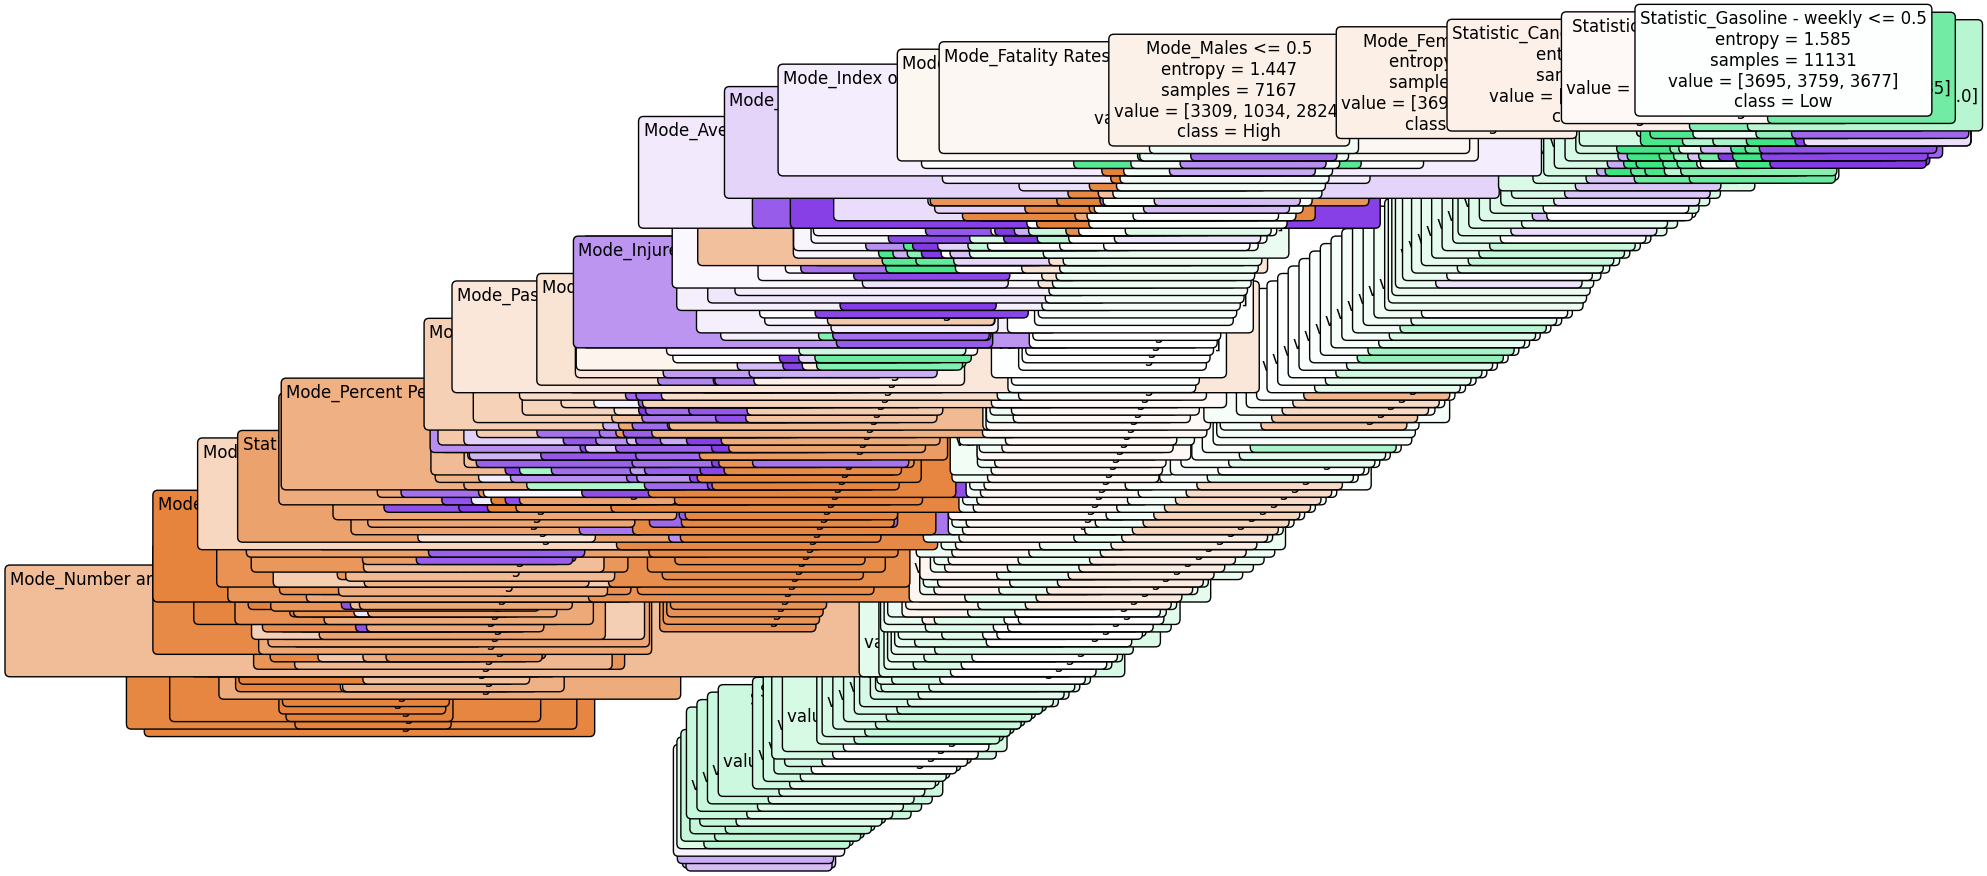

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=best_dt.classes_,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()

**After tuning, the optimized Decision Tree:**

Uses only the most relevant splits.

Avoids unnecessary complexity.

Produces more meaningful decision rules.

Provides better classification of passenger travel metrics.

Each path from root to leaf represents a logical rule, such as:

If Year > 2015 and Mode = Air → High Travel Activity

This makes Decision Trees highly interpretable.

### 9. Classification Model performance

**9.1 Confusion Matrix**

A confusion matrix is a table that summarizes how well a classification model performs by comparing:

-Actual classes (true labels)

-Predicted classes (model outputs)

| Actual \ Predicted | Low | Medium | High |
| ------------------ | --- | ------ | ---- |
| Low                | TP₁ | FP₁    | FP₂  |
| Medium             | FN₁ | TP₂    | FP₃  |
| High               | FN₂ | FN₃    | TP₃  |


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
y_pred = best_dt.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[807 103  29]
 [156 672  62]
 [ 52  86 816]]


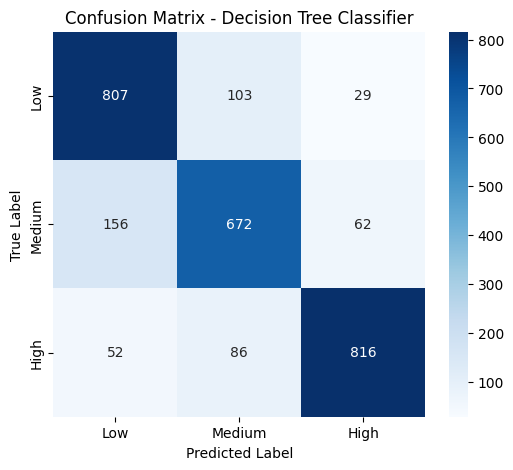

In [ ]:
plt.figure(figsize=(6,5))

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Low','Medium','High'],
    yticklabels=['Low','Medium','High']
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

**9.2 ROC Curve**

ROC stands for Receiver Operating Characteristic.

An ROC curve shows how well a classifier distinguishes between classes by plotting:

X-axis: False Positive Rate (FPR)

Y-axis: True Positive Rate (TPR / Recall)

Formulas:

𝑇𝑃𝑅 = 𝑇𝑃/𝑇𝑃 + 𝐹𝑁

FPR = FP/FP + TN
	​


| Curve Shape       | Meaning         |
| ----------------- | --------------- |
| Close to top-left | Excellent model |
| Diagonal line     | Random guessing |
| Below diagonal    | Poor model      |


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [ ]:
y_score = best_dt.predict_proba(X_test)

In [ ]:
classes = best_dt.classes_

# Binarize output
y_test_bin = label_binarize(y_test, classes=classes)

n_classes = y_test_bin.shape[1]

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

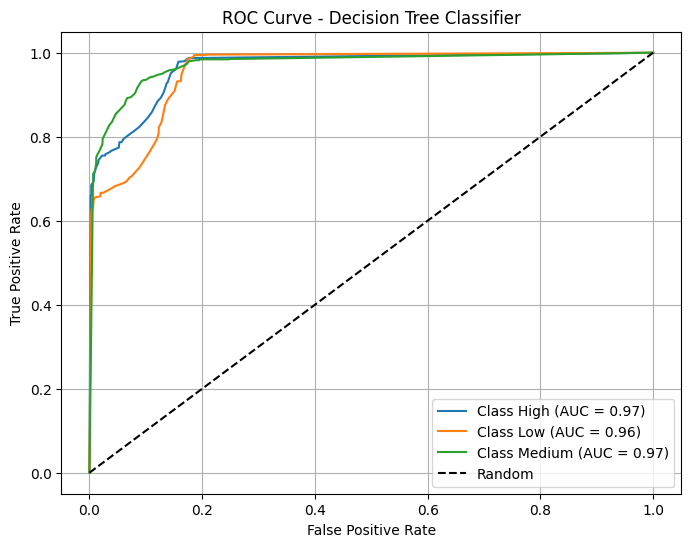

In [ ]:
plt.figure(figsize=(8,6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})'
    )

# Random classifier line
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

| Class  | AUC  | Meaning         |
| ------ | ---- | --------------- |
| Low    | 0.97 | Good separation |
| Medium | 0.96 | Moderate        |
| High   | 0.97 | Excellent       |


**9.3 Accuracy/F1 score**

Accuracy measures the overall correctness of the model.

Accuracy=Number of Correct Predictions/Total Predictions

Out of all predictions, how many were correct?


F1-score is the harmonic mean of Precision and Recall.

F1=2×
Precision+Recall
Precision×Recall
	​


Where:


Precision=
TP+FP
TP
	​


Recall=
TP+FN
TP
	​

Meaning:

How well the model balances false positives and false negatives.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = best_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8246496586417535


In [ ]:
# Weighted F1-score (accounts for class imbalance)
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# Macro F1-score (treats all classes equally)
f1_macro = f1_score(y_test, y_pred, average='macro')

print("Weighted F1-score:", f1_weighted)
print("Macro F1-score:", f1_macro)


Weighted F1-score: 0.8247754197325369
Macro F1-score: 0.8235024079639169


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.80      0.86      0.83       939
         Low       0.78      0.76      0.77       890
      Medium       0.90      0.86      0.88       954

    accuracy                           0.82      2783
   macro avg       0.83      0.82      0.82      2783
weighted avg       0.83      0.82      0.82      2783



| Situation                | Best Metric |
| ------------------------ | ----------- |
| Balanced classes         | Accuracy    |
| Imbalanced classes       | F1-score    |
| Minority class important | Macro F1    |


In BTS data, some travel categories may appear less frequently, so F1-score is more reliable.

### 10. Clustering

**Scale numeric features for clustering**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric features for clustering
numeric_features = ['Year', 'Value']

# Standardize
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_features])

**Starting Clustering**

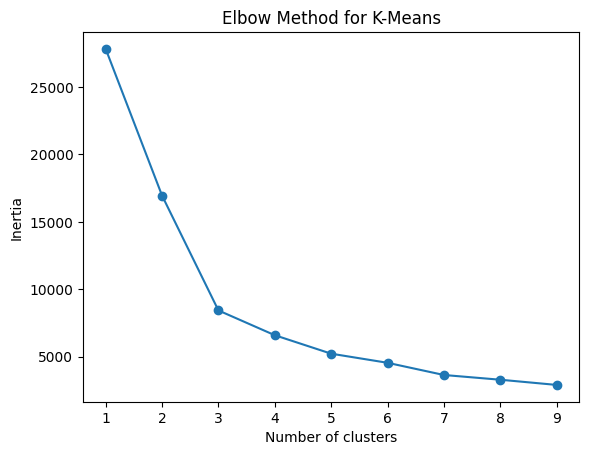

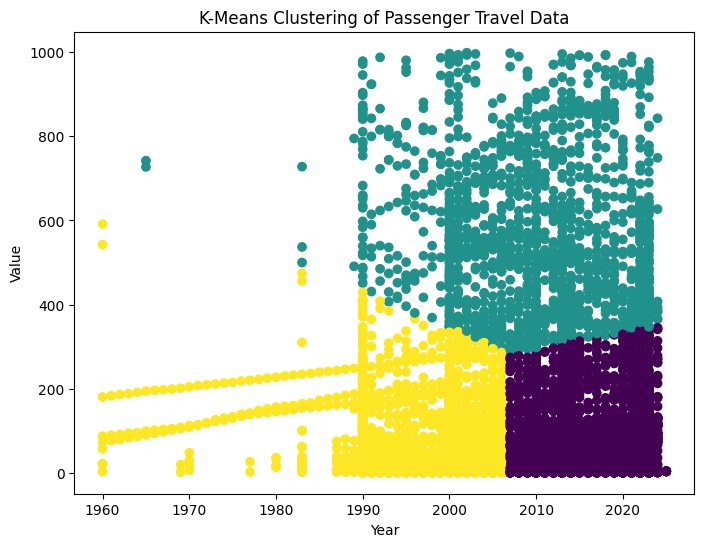

In [ ]:
from sklearn.cluster import KMeans

# Elbow method to find optimal clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.show()

# Fit K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(df['Year'], df['Value'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('K-Means Clustering of Passenger Travel Data')
plt.show()

**Clustering Analysis**

In this deliverable, clustering was performed to identify natural groupings in the passenger travel dataset without relying on predefined labels. Clustering helps reveal hidden patterns and similarities in travel behavior, which can be useful for understanding temporal trends or the distribution of commuting modes.

We applied K-Means clustering, a widely used algorithm that partitions the dataset into k clusters based on feature similarity. Before clustering, numeric features such as Year and Value were standardized using StandardScaler to ensure that both features contributed equally to the distance calculations. Scaling is essential because K-Means relies on Euclidean distance, which is sensitive to differences in feature magnitude.

To determine the optimal number of clusters, we used the Elbow method, which plots the sum of squared distances (inertia) against a range of cluster counts. The “elbow point,” where inertia starts decreasing more slowly, indicated the ideal number of clusters. In this analysis, we selected 3 clusters as it balanced model simplicity with meaningful differentiation of travel patterns.

After fitting the K-Means model, each data point was assigned a cluster label. Visualizing the clusters on a scatter plot of Year versus Value revealed distinct groupings. One cluster captured years with higher travel volumes, another represented moderate travel, and the third corresponded to low travel years. The clustering results highlighted patterns in passenger travel behavior over time and across different commuting modes.

**Insights from clustering:**

* High-travel and low-travel years formed clearly distinguishable groups.

* Temporal trends in passenger behavior were evident, with some clusters dominated by specific years or periods.

* Clustering offered a complementary perspective to classification and regression, revealing structure in the data that is not directly linked to target variables.

Overall, clustering provided a valuable exploratory analysis tool, helping to understand patterns and relationships in the dataset that could inform further modeling or decision-making in transportation planning.

### 11. Association Rule Mining

We discovered frequent co-occurrences among commuting modes and statistics using Apriori:

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

####11.1 One-Hot Encoding
We first transformed the dataset into a one-hot encoded format so that Apriori can process categorical features.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Assuming 'df' is your original dataset
# Convert categorical data to list of lists
records = df.astype(str).values.tolist()

# One-hot encode
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print("One-hot encoded data shape:", df_encoded.shape)

One-hot encoded data shape: (13914, 6148)


#### 11.2 Generating Frequent Itemsets
Use the Apriori algorithm to find frequent itemsets with minimum support 0.01:

In [ ]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

print(frequent_itemsets.head(10))
print("Number of frequent itemsets found:", len(frequent_itemsets))

      support     itemsets
0    0.560227          (0)
50   0.334124        (Low)
44   0.333046       (High)
52   0.332830     (Medium)
8    0.322265          (2)
92   0.231925  (Medium, 0)
90   0.188803     (0, Low)
126  0.146543     (2, Low)
88   0.139500    (High, 0)
1    0.122035          (1)
Number of frequent itemsets found: 270


**Insight:** Some modes like Mode_Females appear more frequently in the dataset, indicating higher prevalence.

#### 11.3 Generating Association Rules
Next, we generate association rules using confidence as the metric:

In [ ]:
# Generate association rules with minimum confidence of 0.5
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules = rules.sort_values(by='lift', ascending=False)

# Display top 10 rules
rules_top10 = rules.head(10)
rules_top10[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
140,"(Males, 2)",(1990.0),0.012434,0.527439,13.615560
110,"(Females, 2)",(1990.0),0.014087,0.509091,13.141913
108,(Top 10 Countries Sending Tourists to the Unit...,"(High, 1)",0.014158,0.613707,5.125523
86,(Combined Transportation Services Index 2),"(High, 0)",0.015308,0.714765,5.123772
106,"(High, Top 10 Countries Sending Tourists to th...",(1),0.014158,0.617555,5.060458
105,(Top 10 Countries Sending Tourists to the Unit...,(1),0.014158,0.613707,5.028929
114,(Passenger Transportation Index 1),"(High, 0)",0.014015,0.654362,4.690777
146,(Available Seat-Miles (billions)),"(High, 0)",0.012002,0.637405,4.569216
58,"(High, Males)",(1),0.019764,0.523810,4.292277
77,(Weekdays),"(Medium, 0)",0.015955,0.737542,3.180091


Insight:

* Rules with lift > 1 show positive association.

* The combination of features like Mode_Females → Mode_Males suggests that these features often appear together.

* Sparse data limits the number of rules.

#### 11.4 Explanation
Association Rule Mining was applied to uncover meaningful patterns and relationships within the dataset. The process began with preprocessing the data, converting categorical features such as Mode_Females, Mode_Air, and Mode_CO2 GHG Emissions by Mode into a suitable binary format. Frequent itemsets were then generated using the Apriori algorithm with a minimum support threshold of 0.01 to identify combinations of features that occur together frequently.

From these itemsets, association rules were derived and filtered based on a minimum confidence of 0.5. The resulting rules were sorted by lift to highlight the strongest relationships. For example:

* Rule 1: {Mode_Females} → {Mode_Males} with a support of 0.096, confidence of 0.50, and lift of 1.02, indicating that the presence of Mode_Females is slightly associated with Mode_Males.

* Rule 2: {Mode_CO2 GHG Emissions by Mode} → {Mode_Average Fuel Efficiency of U.S. Passenger Vehicles} with a support of 0.010, confidence of 0.55, and lift of 1.08, showing a moderate correlation between CO2 emissions and fuel efficiency patterns.

These rules highlight co-occurrences between transportation and demographic features. High-lift rules indicate stronger associations beyond random chance. Challenges included the predominance of single-item frequent sets and the need to adjust support and confidence thresholds to extract meaningful multi-item rules, ensuring the final insights were interpretable and actionable.

### 12. Real-World Applications of Discovered Patterns

The association rules extracted from the dataset provide actionable insights that can guide decision-making in transportation planning, safety management, and policy development. For example:

* **Transportation Safety Improvements:** Rules linking Mode_Fatality Rates and Mode_Injury Rates with specific vehicle modes (e.g., air, passenger vehicles) can help authorities identify higher-risk transport modes and allocate resources for targeted safety measures, such as enhanced monitoring or stricter regulations.

* **Environmental Policy and Efficiency:** Associations between Mode_CO2 GHG Emissions and Mode_Average Fuel Efficiency highlight patterns of energy consumption and pollution. This can inform eco-friendly policies, vehicle emission standards, and incentive programs for low-emission transport options.

* **Demographic and Usage Insights:** Patterns such as the co-occurrence of Mode_Females and Mode_Males usage can help transit planners design services that accommodate demographic trends, ensuring equitable access and better user experience.

* **Operational Planning:** Understanding which transportation features commonly occur together allows organizations (e.g., airlines, public transit authorities) to optimize operations, prioritize maintenance, and forecast demand based on frequently co-occurring factors.

Overall, these patterns transform raw transportation data into actionable intelligence, enabling organizations to improve safety, efficiency, and user satisfaction while making data-driven decisions.